In [90]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, os.path.abspath('../lib/PythonGbinReader/GbinReader/'))
import gbin_reader

# Read in an MDB files path
# files = pd.read_csv('../datasets/gbins/bam/BamObservations_July_2017_Event.txt')

In [91]:
# Read in a BamObservation gbin file
data_file='../datasets/gbins/bam/BamObservation_000-000-007.gbin'
reader = gbin_reader.GbinReader(data_file)
bamObs = reader.__next__()


In [99]:
print("")
print("BAM AC Coordinate   : %s" % bamObs.ac)   
print("BAM Acquistion Time : %s" % bamObs.acqTime)
print("BAM Acquistion Row  : %s" % bamObs.ccdRow)
print("BAM Number of Packet: %s" % bamObs.numPackets)
print("BAM Obs. SolutionId : %s" % bamObs.solutionId)
print("BAM Nb. of  Samples : %s" % len(bamObs.samples))
print("")
print(" --> Each BAM TM Packet is transformed into one BamObservation object.")
print(" --> Each BamObservation contain 2 BAM patterns.")
print(" --> A BAM pattern is 500 (Along Scan - AL) x 80 (Across Scan - AC) samples = 40000.")
print("")


BAM AC Coordinate   : 1645
BAM Acquistion Time : 117189731415913100
BAM Acquistion Row  : 1
BAM Number of Packet: 2
BAM Obs. SolutionId : 3158430714647543808
BAM Nb. of  Samples : 80000

 --> Each BAM TM Packet is transformed into one BamObservation object.
 --> Each BamObservation contain 2 BAM patterns.
 --> A BAM pattern is 500 (Along Scan - AL) x 80 (Across Scan - AC) samples = 40000.



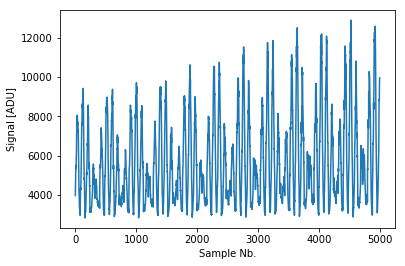

In [100]:

import matplotlib.pyplot as plt
plt.plot(samples[0:5000])
plt.xlabel('Sample Nb.')
plt.ylabel('Signal [ADU]')
plt.show()

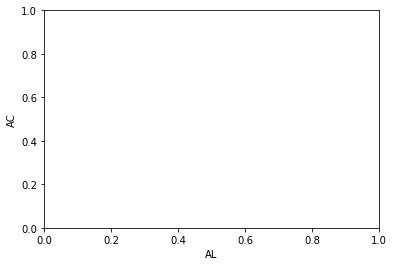

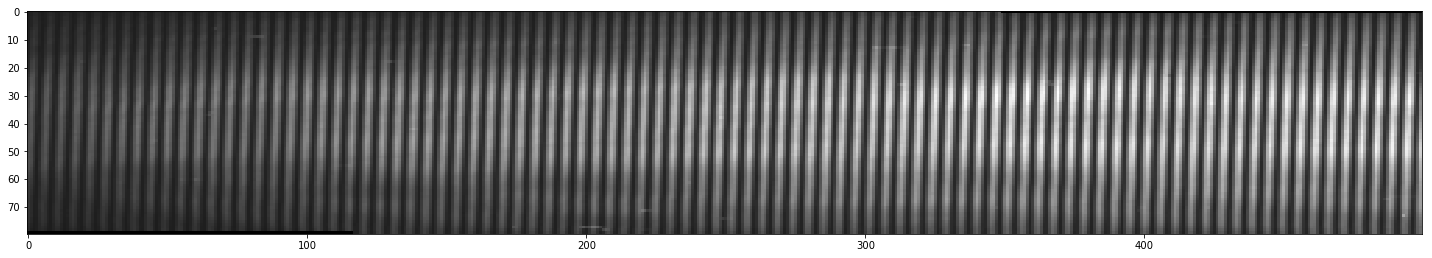

In [101]:
# For curiosity , reshape to see original pattern as in the CCD window
import scipy
from scipy import ndimage
patten_1 = np.array(samples[0:40000]).reshape((500, 80))
patten_2 = np.array(samples[40000:80000]).reshape((500, 80))
rotated_1 = scipy.ndimage.rotate(patten_1, 90)
rotated_2 = scipy.ndimage.rotate(patten_2, 90)
plt.xlabel('AL')
plt.ylabel('AC')
plt.figure(figsize = (25,15))
plt.imshow(rotated_1, cmap='gray')
plt.show()

In [127]:
#
# Function to analyze BAM data to extract the Cosmic Rays in the samples
# Filtering Method   : Median filtering algoithm
# Inputs             : Input should consist of 
# samples            : a single BAM pattern
# gain               : BAM CCD gain          (default is : 0.2566 )
# readns             : BAM CCD readout noise (default is : 8.365785291814616d )
# bias               : BAM CCD bias          (default is : 2576.000 )
# threshold (sigmas) : filtering threshold   (default is : 4.5 sigmas )
def extractCosmics(samples,gain,readns,bias,threshold):
    
    "---------------------------------------------- "
    " Inputs  : ->                                  "
    " samples : np.array[40000] of flux samples     "
    " gain    : BAM CCD gain                        "
    " readns  : BAM CCD read out noise              "
    " bias    : BAM CCD bias                        " 
    "---------------------------------------------- "
    
    # Compute medians of the samples
    medians = np.median(samples, axis=0)
    
    # Get median electrons and estimate total Poisson + read-out noise
    electrons =[(x-bias)/gain for x in medians]
    noise     =[ x + (readns*readns) for x in electrons]
    
    # check: computes median to observed flux difference in noise sigmas
    # Samples with cosmics are those aboth this n times threshold in noise sigmas
    # create a mask of the cosmics 
    difference = np.subtract(samples,medians)
    mask = [x/gain/noise>threshold for x in difference]                                       
        
    return mask;    

In [128]:
# Example of extraction
gn=0.2566
ns=8.365785291814616
bs=2576.000
th=4.5
mask=extractCosmics(patten_1,gn,ns,bs,th)

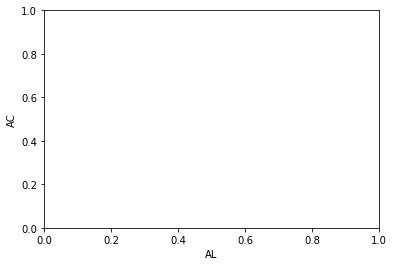

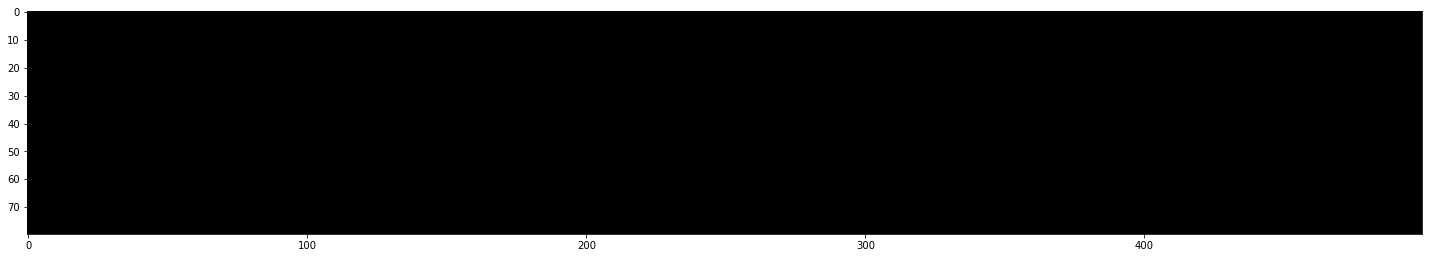

In [129]:
# Plot mask
from matplotlib.colors import LogNorm
cosmics = np.array(mask[0:40000]).reshape((500, 80))
rotated = scipy.ndimage.rotate(cosmics, 90)
plt.xlabel('AL')
plt.ylabel('AC')
plt.figure(figsize = (25,15))
plt.imshow(rotated, cmap='gray')
plt.show()

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False], dtype=bool),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,